In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns
import matplotlib as mpl
import matplotlib.patches as patches
from matplotlib.pyplot import Line2D
from matplotlib.patches import Patch, Rectangle
# mpl.rcParams['font.family'] = 'Liberation Sans'

### select start stand age & forest type

In [158]:
stand_age = 40

In [130]:
stand_age = 80

In [173]:
forest_type = 'conifer'
forest_type_full = 'Planted conifer (excluding pine)'

In [166]:
forest_type = 'natreg'
forest_type_full = 'Naturally regenerated forest'

### read in data & rescale from tonne to million tonne

In [174]:
data = pd.read_csv('../results/C_estimate_95ci_loMiUpGrowthFunc_start'+str(stand_age)+'_'+forest_type+'.csv')

In [175]:
data.columns = ['index', 'year', 'C', 'C_up', 'C_lo', 'upC', 'upC_up', 'upC_lo', 'loC', 'loC_up', 'loC_lo']

In [176]:
data.head(2)

,index,year,C,C_up,C_lo,upC,upC_up,upC_lo,loC,loC_up,loC_lo
0,carbon1990CON,1990,4.201811e+07,3.879532e+07,4.524089e+07,4.697781e+07,4.337946e+07,5.057615e+07,3.617285e+07,3.339815e+07,3.894756e+07
1,carbon1991CON,1991,4.267376e+07,3.937903e+07,4.596848e+07,4.753729e+07,4.387573e+07,5.119885e+07,3.697016e+07,3.411513e+07,3.982519e+07


In [177]:
for c in range(2, data.shape[1]):
    data.iloc[:, c] = data.iloc[:, c] / 1e6

In [178]:
data.head(2)

,index,year,C,C_up,C_lo,upC,upC_up,upC_lo,loC,loC_up,loC_lo
0,carbon1990CON,1990,42.018107,38.795323,45.240892,46.977807,43.379465,50.576150,36.172854,33.398152,38.947556
1,carbon1991CON,1991,42.673757,39.379030,45.968484,47.537294,43.875734,51.198855,36.970159,34.115132,39.825187


### plot carbon estimates and uncertainties

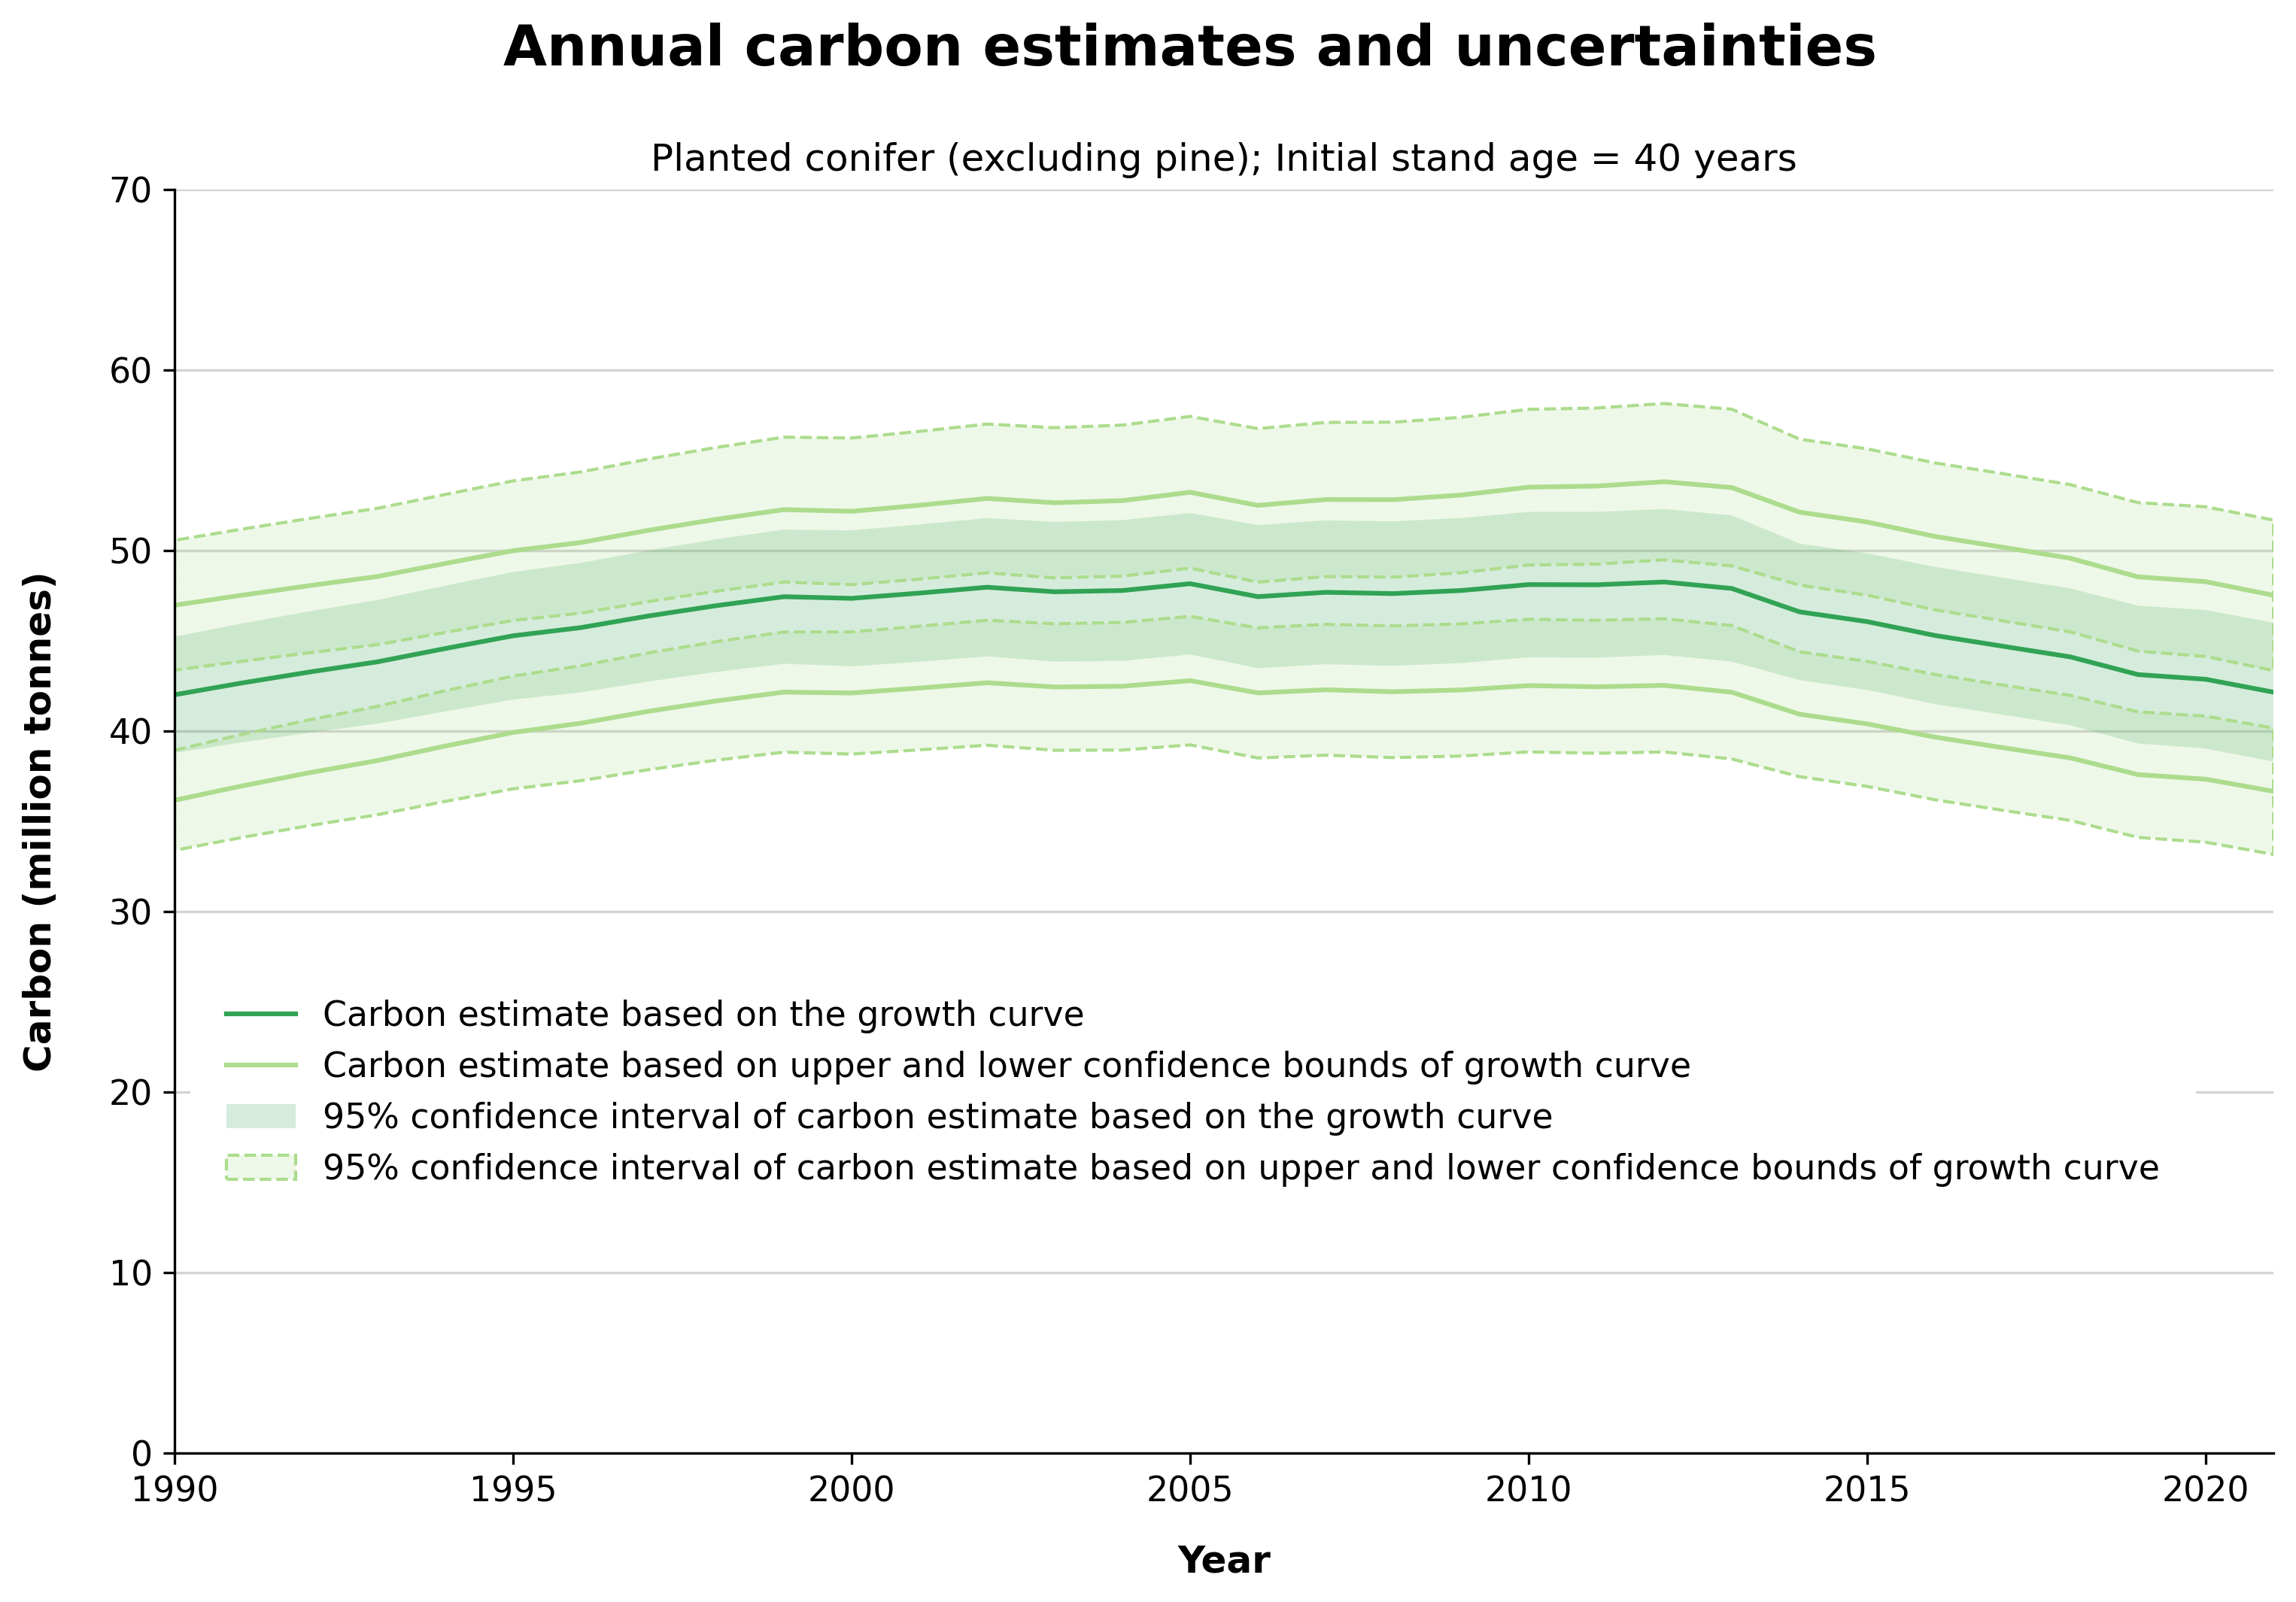

In [181]:
# colors
greens = ['#e5f5e0','#a1d99b','#31a354']  # light 2 dark
yellow2green256 = [list(eval(string[3:])) for string in ['rgb(247,252,185)','rgb(173,221,142)','rgb(49,163,84)']]
yellow2green = [[rgb/256 for rgb in rgb_lst] for rgb_lst in yellow2green256]

# plot
fig, ax = plt.subplots(1, figsize=(12,12*.618), dpi=300)
## estimate
ax.plot(data.year, data.C, color=greens[2], label='Carbon estimate based on the growth curve')
## ci
ax.fill_between(data.year, data.C_lo, data.C_up, 
                alpha=0.2, color=greens[2], edgecolor=None, 
                label='95% confidence interval of carbon estimate based on the growth curve')

ax.plot(data.year, data.upC, color=yellow2green[1], 
        label='Carbon estimate based on upper and lower confidence bounds of growth curve')
ax.fill_between(data.year, data.upC_lo, data.upC_up, 
                facecolor=yellow2green[1]+[0.2], edgecolor=yellow2green[1]+[1], 
                linestyle='--', 
                label='95% confidence interval of carbon estimate based on upper and lower confidence bounds of growth curve')

ax.plot(data.year, data.loC, color=yellow2green[1])
ax.fill_between(data.year, data.loC_lo, data.loC_up, 
                facecolor=yellow2green[1]+[0.2], edgecolor=yellow2green[1]+[1], 
                linestyle='--')
# aesthetics
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(axis='y', color='lightgrey')
ax.set_axisbelow(True)
ax.set_xticks(range(1990,2022,5))
plt.setp(ax.get_xticklabels(), fontsize=11)
plt.setp(ax.get_yticklabels(), fontsize=11)
ax.set_xlim(1990,2021)
ax.set_ylim(0,70)
# labels
ax.set_xlabel('Year', labelpad=11, fontsize=12, fontweight='bold')
ax.set_ylabel('Carbon (million tonnes)', labelpad=16, fontsize=12, fontweight='bold')
ax.legend(loc='upper left', bbox_to_anchor=(0, 0.4), framealpha=1, 
          fontsize=11, facecolor='white', edgecolor='white', borderpad=1)
plt.suptitle('Annual carbon estimates and uncertainties', fontsize=18, fontweight='bold')
plt.title(forest_type_full+'; Initial stand age = '+str(stand_age)+' years')
# # save figure
# plt.savefig('../results/C_estimate_ci_start'+str(stand_age)+'_'+forest_type+'.png',
#            bbox_inches='tight', facecolor='white')